In [ ]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
from IPython.display import Image
import scanpy as sc
from cnmf import cNMF

In [ ]:
np.random.seed(14)

In [ ]:
adata=sc.read('/media/external/testserver/maria_e/CRC/CRC/xenium_processing/combined_adata/combined_clustering_obsm-Copy1.h5ad',var_names='gene_id')
adata.var_names_make_unique()

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
interesting_clusters =['Neoplastic', 'neoplastic_1','transit amplifying cell?_1']

In [ ]:
cNMF_tumoral = adata[adata.obs['combined_clusters'].astype(str).isin(interesting_clusters)].copy()

In [ ]:
sc.pp.filter_cells(cNMF_tumoral, min_genes=8) # filter cells with fewer than 8 genes
sc.pp.filter_cells(cNMF_tumoral, min_counts=20)
sc.pp.filter_genes(cNMF_tumoral, min_cells=3) # filter genes detected in fewer than 3 cells

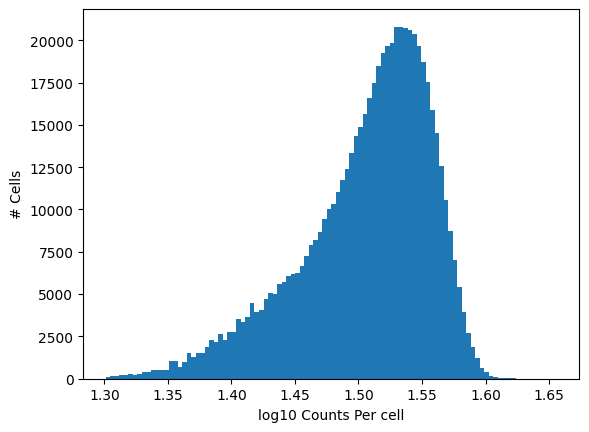

In [ ]:
## plot log10 # counts per cell
plt.hist(np.log10(cNMF_tumoral.obs['n_counts']), bins=100)
_ = plt.xlabel('log10 Counts Per cell')
_ = plt.ylabel('# Cells')
# means that the majority of the cells have around 30 reads. Para deshacer el logaritomo 10^1.50=30

In [ ]:

# Define the folder path and filename
folder_path = '/media/external/testserver/maria_e/CRC/cNMF_data/'
count_adat_fn = os.path.join(folder_path, 'CRC_NMF_counts.h5ad')

# Assuming 'adata' is your AnnData object, save it to the specified file
sc.write(count_adat_fn, cNMF_tumoral)



In [ ]:
numiter=200 # Number of NMF replicates. Set this to a larger value ~200 for real data. We set this to a relatively low value here for illustration at a faster speed
numhvgenes=342 ## Number of over-dispersed genes to use for running the actual factorizations

## Results will be saved to [output_directory]/[run_name] which in this example is example_PBMC/cNMF/pbmc_cNMF
output_directory = '/media/external/testserver/maria_e/CRC/cNMF_data'
if not os.path.exists(output_directory):
    os.mkdir(output_directory)
run_name = 'trial1_cNMF'

## Specify the Ks to use as a space separated list in this case "5 6 7 8 9 10"
K = ' '.join([str(i) for i in range(5,16)])

## To speed this up, you can run it for only K=7-8 with the option below
#K = ' '.join([str(i) for i in range(7,9)])


seed = 14 ## Specify a seed pseudorandom number generation for reproducibility

## Path to the filtered counts dataset we output previously
countfn = '/media/external/testserver/maria_e/CRC/cNMF_data/CRC_NMF_counts.h5ad'

In [ ]:
## Initialize the cnmf object that will be used to run analyses
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [ ]:
## Prepare the data,
cnmf_obj.prepare(counts_fn=countfn, components=np.arange(5,16), n_iter=200, seed=14, num_highvar_genes=342)

In [ ]:
## Specify that the jobs are being distributed over a single worker (total_workers=1) and then launch that worker
cnmf_obj.factorize(worker_i=0, total_workers=1)

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

[Worker 0]. Starting task 268.
[Worker 0]. Starting task 269.
[Worker 0]. Starting task 270.
[Worker 0]. Starting task 271.
[Worker 0]. Starting task 272.
[Worker 0]. Starting task 273.
[Worker 0]. Starting task 274.
[Worker 0]. Starting task 275.
[Worker 0]. Starting task 276.
[Worker 0]. Starting task 277.
[Worker 0]. Starting task 278.
[Worker 0]. Starting task 279.
[Worker 0]. Starting task 280.
[Worker 0]. Starting task 281.
[Worker 0]. Starting task 282.
[Worker 0]. Starting task 283.
[Worker 0]. Starting task 284.
[Worker 0]. Starting task 285.
[Worker 0]. Starting task 286.
[Worker 0]. Starting task 287.
[Worker 0]. Starting task 288.
[Worker 0]. Starting task 289.
[Worker 0]. Starting task 290.
[Worker 0]. Starting task 291.
[Worker 0]. Starting task 292.
[Worker 0]. Starting task 293.
[Worker 0]. Starting task 294.
[Worker 0]. Starting task 295.
[Worker 0]. Starting task 296.
[Worker 0]. Starting task 297.
[Worker 0]. Starting task 298.
[Worker 0]. Starting task 299.
[Worker 

[Worker 0]. Starting task 533.
[Worker 0]. Starting task 534.
[Worker 0]. Starting task 535.
[Worker 0]. Starting task 536.
[Worker 0]. Starting task 537.
[Worker 0]. Starting task 538.
[Worker 0]. Starting task 539.
[Worker 0]. Starting task 540.
[Worker 0]. Starting task 541.
[Worker 0]. Starting task 542.
[Worker 0]. Starting task 543.
[Worker 0]. Starting task 544.
[Worker 0]. Starting task 545.
[Worker 0]. Starting task 546.
[Worker 0]. Starting task 547.
[Worker 0]. Starting task 548.
[Worker 0]. Starting task 549.
[Worker 0]. Starting task 550.
[Worker 0]. Starting task 551.
[Worker 0]. Starting task 552.
[Worker 0]. Starting task 553.
[Worker 0]. Starting task 554.
[Worker 0]. Starting task 555.
[Worker 0]. Starting task 556.
[Worker 0]. Starting task 557.
[Worker 0]. Starting task 558.
[Worker 0]. Starting task 559.
[Worker 0]. Starting task 560.
[Worker 0]. Starting task 561.
[Worker 0]. Starting task 562.
[Worker 0]. Starting task 563.
[Worker 0]. Starting task 564.
[Worker 

[Worker 0]. Starting task 798.
[Worker 0]. Starting task 799.
[Worker 0]. Starting task 800.
[Worker 0]. Starting task 801.
[Worker 0]. Starting task 802.
[Worker 0]. Starting task 803.
[Worker 0]. Starting task 804.
[Worker 0]. Starting task 805.
[Worker 0]. Starting task 806.
[Worker 0]. Starting task 807.
[Worker 0]. Starting task 808.
[Worker 0]. Starting task 809.
[Worker 0]. Starting task 810.
[Worker 0]. Starting task 811.
[Worker 0]. Starting task 812.
[Worker 0]. Starting task 813.
[Worker 0]. Starting task 814.
[Worker 0]. Starting task 815.
[Worker 0]. Starting task 816.
[Worker 0]. Starting task 817.
[Worker 0]. Starting task 818.
[Worker 0]. Starting task 819.
[Worker 0]. Starting task 820.
[Worker 0]. Starting task 821.
[Worker 0]. Starting task 822.
[Worker 0]. Starting task 823.
[Worker 0]. Starting task 824.
[Worker 0]. Starting task 825.
[Worker 0]. Starting task 826.
[Worker 0]. Starting task 827.
[Worker 0]. Starting task 828.
[Worker 0]. Starting task 829.
[Worker 

[Worker 0]. Starting task 1061.
[Worker 0]. Starting task 1062.
[Worker 0]. Starting task 1063.
[Worker 0]. Starting task 1064.
[Worker 0]. Starting task 1065.
[Worker 0]. Starting task 1066.
[Worker 0]. Starting task 1067.
[Worker 0]. Starting task 1068.
[Worker 0]. Starting task 1069.
[Worker 0]. Starting task 1070.
[Worker 0]. Starting task 1071.
[Worker 0]. Starting task 1072.
[Worker 0]. Starting task 1073.
[Worker 0]. Starting task 1074.
[Worker 0]. Starting task 1075.
[Worker 0]. Starting task 1076.
[Worker 0]. Starting task 1077.
[Worker 0]. Starting task 1078.
[Worker 0]. Starting task 1079.
[Worker 0]. Starting task 1080.
[Worker 0]. Starting task 1081.
[Worker 0]. Starting task 1082.
[Worker 0]. Starting task 1083.
[Worker 0]. Starting task 1084.
[Worker 0]. Starting task 1085.
[Worker 0]. Starting task 1086.
[Worker 0]. Starting task 1087.
[Worker 0]. Starting task 1088.
[Worker 0]. Starting task 1089.
[Worker 0]. Starting task 1090.
[Worker 0]. Starting task 1091.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1238.
[Worker 0]. Starting task 1239.
[Worker 0]. Starting task 1240.
[Worker 0]. Starting task 1241.
[Worker 0]. Starting task 1242.
[Worker 0]. Starting task 1243.
[Worker 0]. Starting task 1244.
[Worker 0]. Starting task 1245.
[Worker 0]. Starting task 1246.
[Worker 0]. Starting task 1247.
[Worker 0]. Starting task 1248.
[Worker 0]. Starting task 1249.
[Worker 0]. Starting task 1250.
[Worker 0]. Starting task 1251.
[Worker 0]. Starting task 1252.
[Worker 0]. Starting task 1253.
[Worker 0]. Starting task 1254.
[Worker 0]. Starting task 1255.
[Worker 0]. Starting task 1256.
[Worker 0]. Starting task 1257.
[Worker 0]. Starting task 1258.
[Worker 0]. Starting task 1259.
[Worker 0]. Starting task 1260.
[Worker 0]. Starting task 1261.
[Worker 0]. Starting task 1262.
[Worker 0]. Starting task 1263.
[Worker 0]. Starting task 1264.
[Worker 0]. Starting task 1265.
[Worker 0]. Starting task 1266.
[Worker 0]. Starting task 1267.
[Worker 0]. Starting task 1268.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1418.
[Worker 0]. Starting task 1419.
[Worker 0]. Starting task 1420.
[Worker 0]. Starting task 1421.
[Worker 0]. Starting task 1422.
[Worker 0]. Starting task 1423.
[Worker 0]. Starting task 1424.
[Worker 0]. Starting task 1425.
[Worker 0]. Starting task 1426.
[Worker 0]. Starting task 1427.
[Worker 0]. Starting task 1428.
[Worker 0]. Starting task 1429.
[Worker 0]. Starting task 1430.
[Worker 0]. Starting task 1431.
[Worker 0]. Starting task 1432.
[Worker 0]. Starting task 1433.
[Worker 0]. Starting task 1434.
[Worker 0]. Starting task 1435.
[Worker 0]. Starting task 1436.
[Worker 0]. Starting task 1437.
[Worker 0]. Starting task 1438.
[Worker 0]. Starting task 1439.
[Worker 0]. Starting task 1440.
[Worker 0]. Starting task 1441.
[Worker 0]. Starting task 1442.
[Worker 0]. Starting task 1443.
[Worker 0]. Starting task 1444.
[Worker 0]. Starting task 1445.
[Worker 0]. Starting task 1446.
[Worker 0]. Starting task 1447.
[Worker 0]. Starting task 1448.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1617.
[Worker 0]. Starting task 1618.
[Worker 0]. Starting task 1619.
[Worker 0]. Starting task 1620.
[Worker 0]. Starting task 1621.
[Worker 0]. Starting task 1622.
[Worker 0]. Starting task 1623.
[Worker 0]. Starting task 1624.
[Worker 0]. Starting task 1625.
[Worker 0]. Starting task 1626.
[Worker 0]. Starting task 1627.
[Worker 0]. Starting task 1628.
[Worker 0]. Starting task 1629.
[Worker 0]. Starting task 1630.
[Worker 0]. Starting task 1631.
[Worker 0]. Starting task 1632.
[Worker 0]. Starting task 1633.
[Worker 0]. Starting task 1634.
[Worker 0]. Starting task 1635.
[Worker 0]. Starting task 1636.
[Worker 0]. Starting task 1637.
[Worker 0]. Starting task 1638.
[Worker 0]. Starting task 1639.
[Worker 0]. Starting task 1640.
[Worker 0]. Starting task 1641.
[Worker 0]. Starting task 1642.
[Worker 0]. Starting task 1643.
[Worker 0]. Starting task 1644.
[Worker 0]. Starting task 1645.
[Worker 0]. Starting task 1646.
[Worker 0]. Starting task 1647.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1662.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1663.
[Worker 0]. Starting task 1664.
[Worker 0]. Starting task 1665.
[Worker 0]. Starting task 1666.
[Worker 0]. Starting task 1667.
[Worker 0]. Starting task 1668.
[Worker 0]. Starting task 1669.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1670.
[Worker 0]. Starting task 1671.
[Worker 0]. Starting task 1672.
[Worker 0]. Starting task 1673.
[Worker 0]. Starting task 1674.
[Worker 0]. Starting task 1675.
[Worker 0]. Starting task 1676.
[Worker 0]. Starting task 1677.
[Worker 0]. Starting task 1678.
[Worker 0]. Starting task 1679.
[Worker 0]. Starting task 1680.
[Worker 0]. Starting task 1681.
[Worker 0]. Starting task 1682.
[Worker 0]. Starting task 1683.
[Worker 0]. Starting task 1684.
[Worker 0]. Starting task 1685.
[Worker 0]. Starting task 1686.
[Worker 0]. Starting task 1687.
[Worker 0]. Starting task 1688.
[Worker 0]. Starting task 1689.
[Worker 0]. Starting task 1690.
[Worker 0]. Starting task 1691.
[Worker 0]. Starting task 1692.
[Worker 0]. Starting task 1693.
[Worker 0]. Starting task 1694.
[Worker 0]. Starting task 1695.
[Worker 0]. Starting task 1696.
[Worker 0]. Starting task 1697.
[Worker 0]. Starting task 1698.
[Worker 0]. Starting task 1699.
[Worker 0]. Starting task 1700.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1753.
[Worker 0]. Starting task 1754.
[Worker 0]. Starting task 1755.
[Worker 0]. Starting task 1756.
[Worker 0]. Starting task 1757.
[Worker 0]. Starting task 1758.
[Worker 0]. Starting task 1759.
[Worker 0]. Starting task 1760.
[Worker 0]. Starting task 1761.
[Worker 0]. Starting task 1762.
[Worker 0]. Starting task 1763.
[Worker 0]. Starting task 1764.
[Worker 0]. Starting task 1765.
[Worker 0]. Starting task 1766.
[Worker 0]. Starting task 1767.
[Worker 0]. Starting task 1768.
[Worker 0]. Starting task 1769.
[Worker 0]. Starting task 1770.
[Worker 0]. Starting task 1771.
[Worker 0]. Starting task 1772.
[Worker 0]. Starting task 1773.
[Worker 0]. Starting task 1774.
[Worker 0]. Starting task 1775.
[Worker 0]. Starting task 1776.
[Worker 0]. Starting task 1777.
[Worker 0]. Starting task 1778.
[Worker 0]. Starting task 1779.
[Worker 0]. Starting task 1780.
[Worker 0]. Starting task 1781.
[Worker 0]. Starting task 1782.
[Worker 0]. Starting task 1783.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1829.
[Worker 0]. Starting task 1830.
[Worker 0]. Starting task 1831.
[Worker 0]. Starting task 1832.
[Worker 0]. Starting task 1833.
[Worker 0]. Starting task 1834.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1835.
[Worker 0]. Starting task 1836.
[Worker 0]. Starting task 1837.
[Worker 0]. Starting task 1838.
[Worker 0]. Starting task 1839.
[Worker 0]. Starting task 1840.
[Worker 0]. Starting task 1841.
[Worker 0]. Starting task 1842.
[Worker 0]. Starting task 1843.
[Worker 0]. Starting task 1844.
[Worker 0]. Starting task 1845.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1846.
[Worker 0]. Starting task 1847.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1848.
[Worker 0]. Starting task 1849.
[Worker 0]. Starting task 1850.
[Worker 0]. Starting task 1851.
[Worker 0]. Starting task 1852.
[Worker 0]. Starting task 1853.
[Worker 0]. Starting task 1854.
[Worker 0]. Starting task 1855.
[Worker 0]. Starting task 1856.
[Worker 0]. Starting task 1857.
[Worker 0]. Starting task 1858.
[Worker 0]. Starting task 1859.
[Worker 0]. Starting task 1860.
[Worker 0]. Starting task 1861.
[Worker 0]. Starting task 1862.
[Worker 0]. Starting task 1863.
[Worker 0]. Starting task 1864.
[Worker 0]. Starting task 1865.
[Worker 0]. Starting task 1866.
[Worker 0]. Starting task 1867.
[Worker 0]. Starting task 1868.
[Worker 0]. Starting task 1869.
[Worker 0]. Starting task 1870.
[Worker 0]. Starting task 1871.
[Worker 0]. Starting task 1872.
[Worker 0]. Starting task 1873.
[Worker 0]. Starting task 1874.
[Worker 0]. Starting task 1875.
[Worker 0]. Starting task 1876.
[Worker 0]. Starting task 1877.
[Worker 0]. Starting task 1878.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1923.
[Worker 0]. Starting task 1924.
[Worker 0]. Starting task 1925.
[Worker 0]. Starting task 1926.
[Worker 0]. Starting task 1927.
[Worker 0]. Starting task 1928.
[Worker 0]. Starting task 1929.
[Worker 0]. Starting task 1930.
[Worker 0]. Starting task 1931.
[Worker 0]. Starting task 1932.
[Worker 0]. Starting task 1933.
[Worker 0]. Starting task 1934.
[Worker 0]. Starting task 1935.
[Worker 0]. Starting task 1936.
[Worker 0]. Starting task 1937.
[Worker 0]. Starting task 1938.
[Worker 0]. Starting task 1939.
[Worker 0]. Starting task 1940.
[Worker 0]. Starting task 1941.
[Worker 0]. Starting task 1942.
[Worker 0]. Starting task 1943.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1944.
[Worker 0]. Starting task 1945.
[Worker 0]. Starting task 1946.
[Worker 0]. Starting task 1947.
[Worker 0]. Starting task 1948.
[Worker 0]. Starting task 1949.
[Worker 0]. Starting task 1950.
[Worker 0]. Starting task 1951.
[Worker 0]. Starting task 1952.
[Worker 0]. Starting task 1953.
[Worker 0]. Starting task 1954.
[Worker 0]. Starting task 1955.
[Worker 0]. Starting task 1956.
[Worker 0]. Starting task 1957.
[Worker 0]. Starting task 1958.
[Worker 0]. Starting task 1959.
[Worker 0]. Starting task 1960.
[Worker 0]. Starting task 1961.
[Worker 0]. Starting task 1962.
[Worker 0]. Starting task 1963.
[Worker 0]. Starting task 1964.
[Worker 0]. Starting task 1965.
[Worker 0]. Starting task 1966.
[Worker 0]. Starting task 1967.
[Worker 0]. Starting task 1968.
[Worker 0]. Starting task 1969.
[Worker 0]. Starting task 1970.
[Worker 0]. Starting task 1971.
[Worker 0]. Starting task 1972.
[Worker 0]. Starting task 1973.
[Worker 0]. Starting task 1974.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1991.
[Worker 0]. Starting task 1992.
[Worker 0]. Starting task 1993.
[Worker 0]. Starting task 1994.
[Worker 0]. Starting task 1995.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1996.
[Worker 0]. Starting task 1997.
[Worker 0]. Starting task 1998.
[Worker 0]. Starting task 1999.
[Worker 0]. Starting task 2000.
[Worker 0]. Starting task 2001.
[Worker 0]. Starting task 2002.
[Worker 0]. Starting task 2003.
[Worker 0]. Starting task 2004.
[Worker 0]. Starting task 2005.
[Worker 0]. Starting task 2006.
[Worker 0]. Starting task 2007.
[Worker 0]. Starting task 2008.
[Worker 0]. Starting task 2009.
[Worker 0]. Starting task 2010.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 2011.
[Worker 0]. Starting task 2012.
[Worker 0]. Starting task 2013.
[Worker 0]. Starting task 2014.
[Worker 0]. Starting task 2015.
[Worker 0]. Starting task 2016.
[Worker 0]. Starting task 2017.
[Worker 0]. Starting task 2018.
[Worker 0]. Starting task 2019.
[Worker 0]. Starting task 2020.
[Worker 0]. Starting task 2021.
[Worker 0]. Starting task 2022.
[Worker 0]. Starting task 2023.
[Worker 0]. Starting task 2024.
[Worker 0]. Starting task 2025.
[Worker 0]. Starting task 2026.
[Worker 0]. Starting task 2027.
[Worker 0]. Starting task 2028.
[Worker 0]. Starting task 2029.
[Worker 0]. Starting task 2030.
[Worker 0]. Starting task 2031.
[Worker 0]. Starting task 2032.
[Worker 0]. Starting task 2033.
[Worker 0]. Starting task 2034.
[Worker 0]. Starting task 2035.
[Worker 0]. Starting task 2036.
[Worker 0]. Starting task 2037.
[Worker 0]. Starting task 2038.
[Worker 0]. Starting task 2039.
[Worker 0]. Starting task 2040.
[Worker 0]. Starting task 2041.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 2089.
[Worker 0]. Starting task 2090.
[Worker 0]. Starting task 2091.
[Worker 0]. Starting task 2092.
[Worker 0]. Starting task 2093.
[Worker 0]. Starting task 2094.
[Worker 0]. Starting task 2095.
[Worker 0]. Starting task 2096.
[Worker 0]. Starting task 2097.
[Worker 0]. Starting task 2098.
[Worker 0]. Starting task 2099.
[Worker 0]. Starting task 2100.
[Worker 0]. Starting task 2101.
[Worker 0]. Starting task 2102.
[Worker 0]. Starting task 2103.
[Worker 0]. Starting task 2104.
[Worker 0]. Starting task 2105.
[Worker 0]. Starting task 2106.
[Worker 0]. Starting task 2107.
[Worker 0]. Starting task 2108.
[Worker 0]. Starting task 2109.
[Worker 0]. Starting task 2110.
[Worker 0]. Starting task 2111.
[Worker 0]. Starting task 2112.
[Worker 0]. Starting task 2113.
[Worker 0]. Starting task 2114.
[Worker 0]. Starting task 2115.
[Worker 0]. Starting task 2116.
[Worker 0]. Starting task 2117.
[Worker 0]. Starting task 2118.
[Worker 0]. Starting task 2119.
[Worker 

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 2171.
[Worker 0]. Starting task 2172.
[Worker 0]. Starting task 2173.
[Worker 0]. Starting task 2174.
[Worker 0]. Starting task 2175.
[Worker 0]. Starting task 2176.
[Worker 0]. Starting task 2177.
[Worker 0]. Starting task 2178.
[Worker 0]. Starting task 2179.
[Worker 0]. Starting task 2180.
[Worker 0]. Starting task 2181.
[Worker 0]. Starting task 2182.
[Worker 0]. Starting task 2183.
[Worker 0]. Starting task 2184.
[Worker 0]. Starting task 2185.
[Worker 0]. Starting task 2186.
[Worker 0]. Starting task 2187.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 2188.
[Worker 0]. Starting task 2189.
[Worker 0]. Starting task 2190.
[Worker 0]. Starting task 2191.
[Worker 0]. Starting task 2192.
[Worker 0]. Starting task 2193.
[Worker 0]. Starting task 2194.
[Worker 0]. Starting task 2195.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 2196.
[Worker 0]. Starting task 2197.
[Worker 0]. Starting task 2198.


/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 2199.


In [ ]:
# Save the AnnData object with UMAP coordinates
# Define the full path where you want to save the file
output_path = '/media/external/testserver/maria_e/CRC/cNMF_data/cnmf_obj.h5ad'

# Save the AnnData object with UMAP coordinates to the specified path
cnmf_obj.write(output_path)

AttributeError: 'cNMF' object has no attribute 'write'

In [ ]:
cnmf_obj.combine()

Combining factorizations for k=5.
Combining factorizations for k=6.
Combining factorizations for k=7.
Combining factorizations for k=8.
Combining factorizations for k=9.
Combining factorizations for k=10.
Combining factorizations for k=11.
Combining factorizations for k=12.
Combining factorizations for k=13.
Combining factorizations for k=14.
Combining factorizations for k=15.


In [ ]:
# Save the AnnData object with UMAP coordinates
# Define the full path where you want to save the file
output_path = '/media/external/testserver/maria_e/CRC/cNMF_data/cnmf_obj_combined.h5ad'

# Save the AnnData object with UMAP coordinates to the specified path
cnmf_obj.write(output_path)

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:18

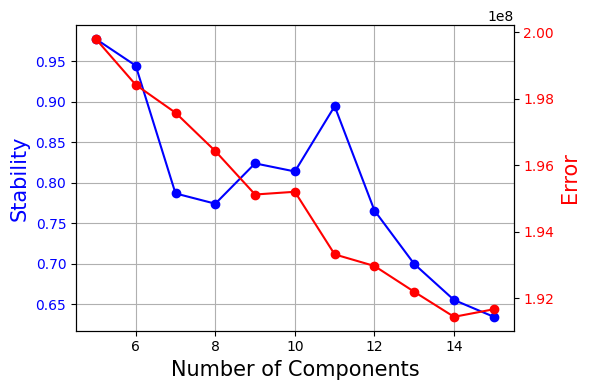

In [ ]:
cnmf_obj.k_selection_plot(close_fig=False)

In [ ]:
save_path = '/media/external/testserver/maria_e/CRC/cNMF_data/k_selection_plot.png'
plt.savefig(save_path)

<Figure size 640x480 with 0 Axes>

In [ ]:
selected_K = 11
density_threshold = 2.00

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


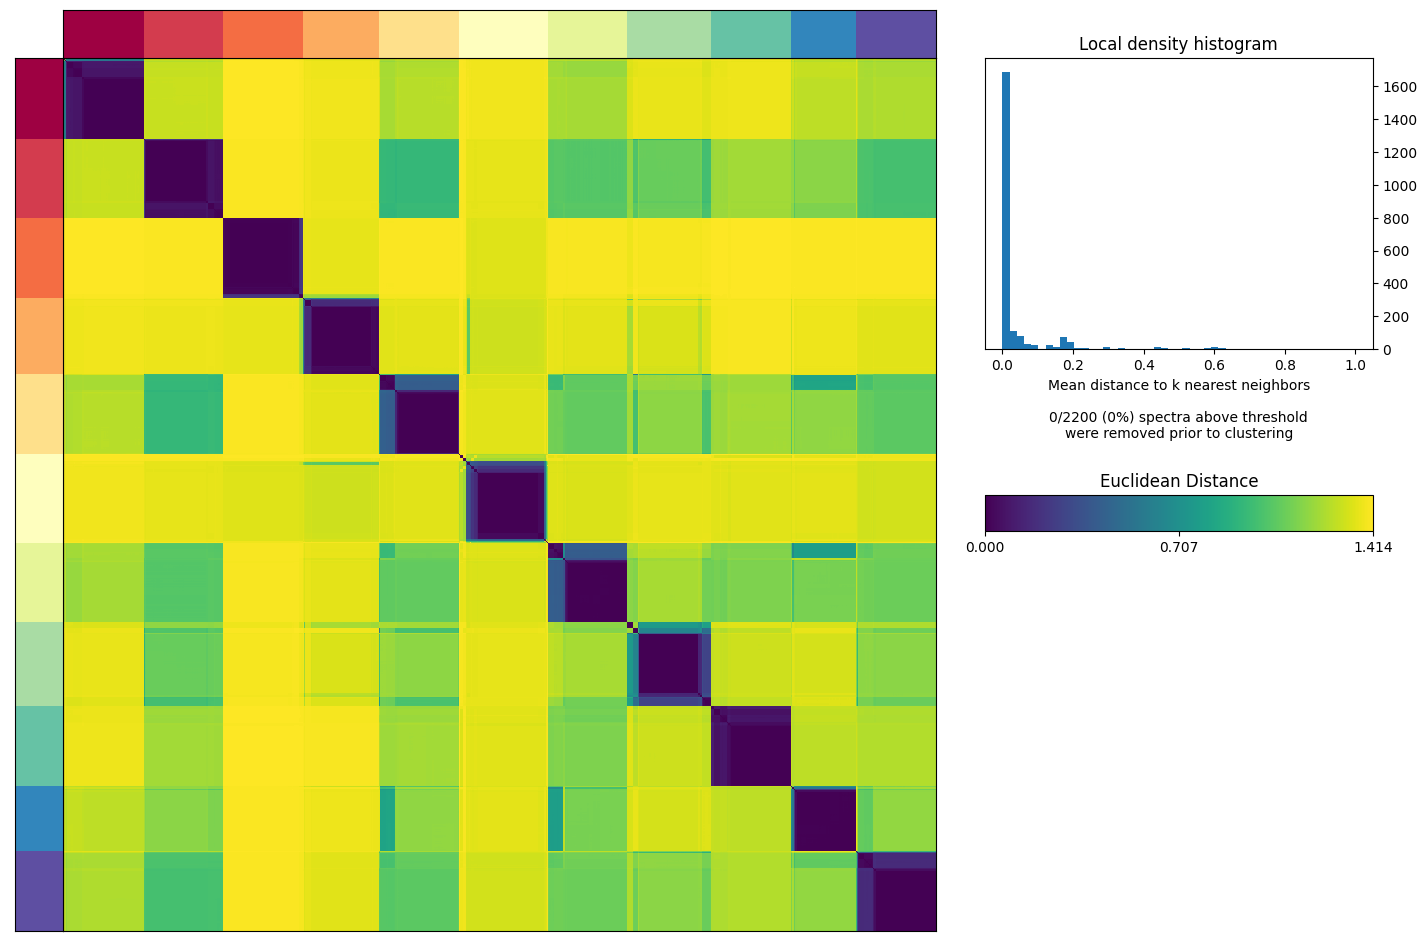

In [ ]:
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)

In [ ]:

density_threshold = 0.10

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


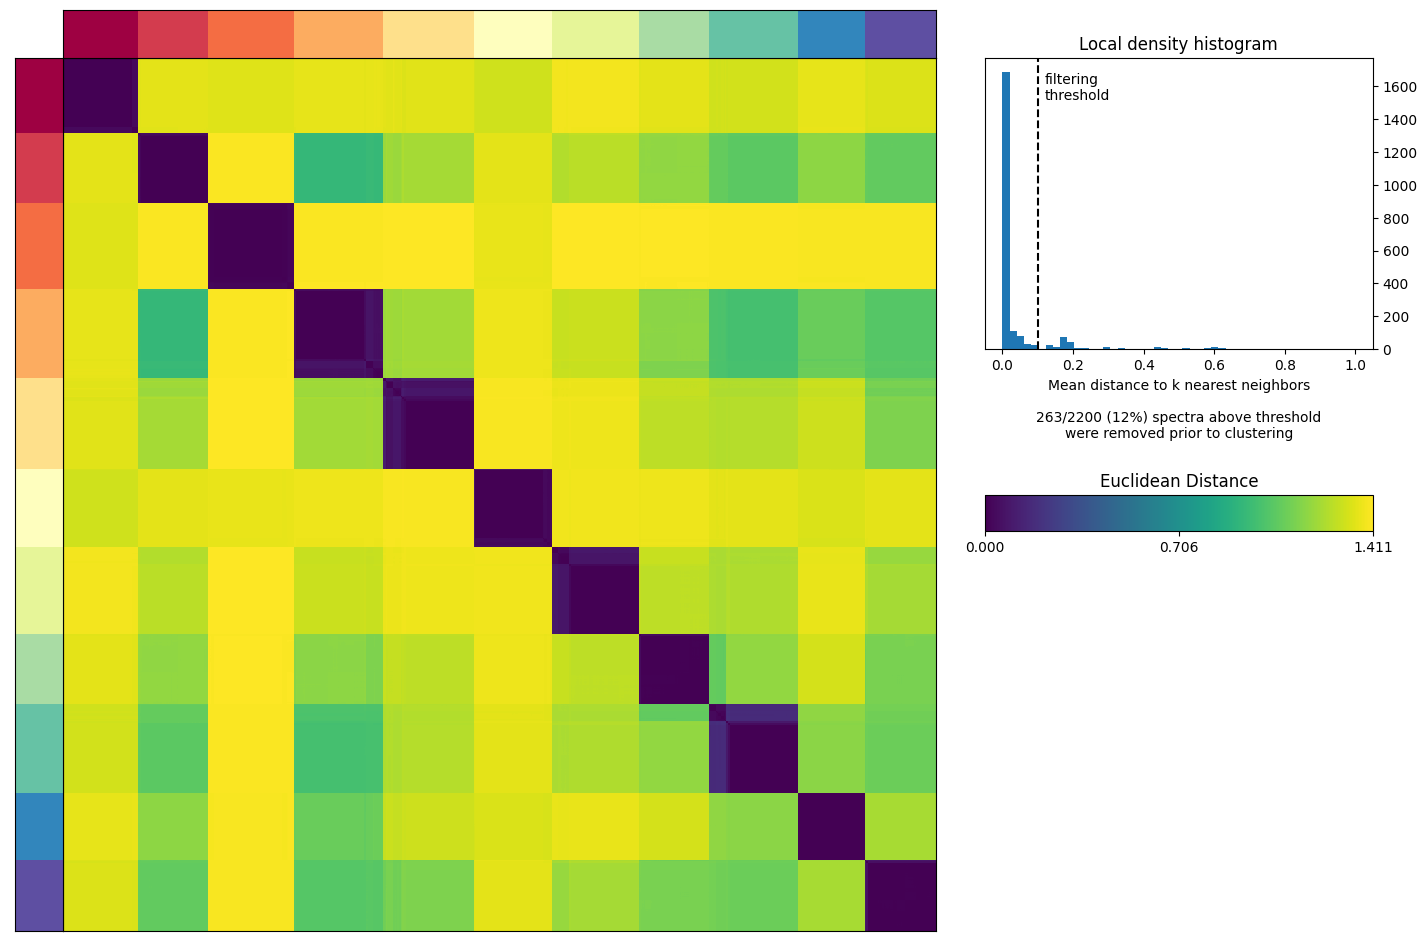

In [ ]:
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)


In [ ]:
usage_norm, gep_scores, gep_tpm, topgenes = cnmf_obj.load_results(K=selected_K, density_threshold=density_threshold)
usage_norm.columns = ['Usage_%d' % i for i in usage_norm.columns]

In [ ]:
gep_tpm

,1,2,3,4,5,6,7,8,9,10,11
ABCC8,0.000000,0.000000,2546.673800,0.000000,0.00000,0.000000,198.37490,0.000000,0.000000,0.000000,43.69706
ADH1C,295.897460,0.000000,6271.552700,5415.728000,0.00000,1853.558500,0.00000,0.000000,0.000000,5772.892600,490.95938
ADRA2A,0.000000,219.812450,3183.896200,0.000000,0.00000,0.000000,179.79301,50.252033,235.411560,0.000000,115.94815
AFAP1L2,0.000000,393.752170,828.119000,0.000000,0.00000,0.000000,243.23738,0.000000,962.959350,0.040274,757.25510
AGTR1,13.751237,0.000000,3096.499300,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
NegControlProbe_00012,0.502360,0.000000,17.644651,0.106411,0.00000,0.000000,0.00000,0.000000,0.000000,1.810527,0.00000
NegControlProbe_00009,2.067309,0.000000,6.342358,0.000000,0.00000,0.000000,0.00000,0.000000,3.040371,4.650108,0.00000
NegControlProbe_00004,0.000000,1.220878,0.000000,0.000000,0.00000,0.262781,0.00000,0.000000,0.000000,0.090850,0.00000
NegControlProbe_00003,0.000000,0.000000,8.422893,0.000000,0.09401,0.000000,0.00000,1.672585,0.000000,4.519832,0.00000


In [ ]:
gep_tpm.to_csv('/media/external/testserver/maria_e/CRC/cNMF_data/gep_tpm_k11.csv')

In [ ]:
topgenes.head(20)

,1,2,3,4,5,6,7,8,9,10,11
0,FERMT1,CPE,TRGV4,LGR5,RRM2,AREG,AKR1C3,DUOX2,CCR7,RPS4Y1,GZMA
1,LCN2,IFITM1,SLC29A4,PROX1,HMGB2,GPRIN3,SCNN1A,SDCBP2,IL7R,NXPE4,CCL5
2,PPP1R1B,OLFM4,ARHGAP24,SLC12A2,UBE2C,LEFTY1,SLC26A3,HHLA2,CD83,SELENBP1,TRBC2
3,CEACAM6,SLC26A2,HPGDS,RGMB,MKI67,C1QBP,RBP4,SLC6A8,CXCR4,LEFTY1,CD2
4,CEACAM5,CEACAM5,RUNX1T1,SMOC2,TK1,UGT2A3,MLPH,ANXA1,IGFBP7,OLFM4,CD8A
5,CFTR,AREG,COL19A1,RNF43,TYMS,PSTPIP2,MUC12,CEACAM7,DNASE1L3,SULT1B1,CD3E
6,AZGP1,THBS1,KLRC2,ALDH1B1,TUBB,SMOC2,CREB3L1,CXCL3,CYBB,RETNLB,CD3D
7,CCL20,CEACAM1,KRT86,SOX9,PTTG1,CD24,CADPS,COL17A1,GPR183,PPP1R1B,TRAC
8,CMBL,TIMP3,NOVA1,ASCL2,STMN1,CKAP4,CDHR5,CCL20,SOCS3,CHP2,CD3G
9,CES1,TKT,KRT1,EPHB3,PBK,SEC11C,EBPL,SLPI,PLXND1,ALDH1B1,NKG7


In [ ]:
topgenes.to_csv('/media/external/testserver/maria_e/CRC/cNMF_data/topgenes_k11.csv')

In [ ]:
gep_scores

,1,2,3,4,5,6,7,8,9,10,11
ABCC8,-0.001474,-0.000767,0.005798,-0.000341,-0.001469,-0.001453,0.000350,-0.001405,-0.001370,-0.001317,-0.000320
ADH1C,-0.001659,-0.004559,0.004507,0.008972,-0.004651,0.000736,-0.003451,-0.003253,-0.001787,0.007770,-0.001067
ADRA2A,-0.001298,0.000299,0.005573,-0.001354,-0.002185,-0.001681,-0.000209,-0.000639,-0.000313,-0.001077,-0.000601
AFAP1L2,-0.001315,0.001861,0.001832,-0.001644,-0.001332,-0.001772,0.000657,-0.001010,0.002392,-0.000353,0.002005
AGTR1,-0.000217,-0.001708,0.007050,-0.001849,-0.001712,-0.001571,-0.001007,-0.000719,-0.000979,-0.000922,-0.000778
...,...,...,...,...,...,...,...,...,...,...,...
NegControlProbe_00012,-0.000035,-0.000145,0.000473,0.000035,-0.000058,-0.000117,-0.000178,-0.000102,-0.000038,0.000031,-0.000241
NegControlProbe_00009,0.000148,-0.000069,0.000241,-0.000201,0.000012,-0.000228,-0.000108,-0.000118,0.000148,0.000522,-0.000418
NegControlProbe_00004,-0.000023,0.000387,-0.000048,-0.000106,-0.000281,0.000077,-0.000038,-0.000033,-0.000031,0.000021,-0.000060
NegControlProbe_00003,-0.000104,-0.000113,0.000346,-0.000236,0.000252,-0.000174,-0.000122,0.000135,-0.000119,0.000317,-0.000210


In [ ]:
gep_scores.to_csv('/media/external/testserver/maria_e/CRC/cNMF_data/gep_scores_k11.csv')

In [ ]:
usage_norm

,Usage_1,Usage_2,Usage_3,Usage_4,Usage_5,Usage_6,Usage_7,Usage_8,Usage_9,Usage_10,Usage_11
ind,,,,,,,,,,,
aaabgihf-1,0.000000,0.027578,0.027025,0.000000,0.058003,0.570449,0.166972,0.063199,0.086772,0.000000,0.000000
aaabikob-1,0.007911,0.130356,0.000000,0.102045,0.148257,0.453126,0.122829,0.000000,0.014393,0.021083,0.000000
aaacfnjb-1,0.000000,0.113471,0.050284,0.044732,0.101726,0.518185,0.041775,0.000000,0.027563,0.080231,0.022034
aaacgpil-1,0.000000,0.000000,0.086997,0.128766,0.000000,0.504599,0.170790,0.025960,0.057712,0.025176,0.000000
aaacjgpo-1,0.010107,0.050496,0.141186,0.139472,0.110022,0.472575,0.008091,0.000000,0.063369,0.000000,0.004683
...,...,...,...,...,...,...,...,...,...,...,...
ohjghmio-1,0.000000,0.000000,0.557906,0.000000,0.029896,0.000000,0.000000,0.000000,0.328683,0.000000,0.083516
ohjkfnmm-1,0.000000,0.090730,0.600641,0.000000,0.000000,0.000000,0.000000,0.000000,0.308629,0.000000,0.000000
ohloikfj-1,0.000000,0.377172,0.204892,0.104138,0.000000,0.086751,0.023201,0.000000,0.181106,0.000000,0.022740


In [ ]:
usage_norm.to_csv('/media/external/testserver/maria_e/CRC/cNMF_data/usage_norm_k11.csv')

In [ ]:
adata = sc.read(countfn)

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
## Obtain high variance genes that were used for cNMF as these were saved to a text file
hvgs = open('/media/external/testserver/maria_e/CRC/cNMF_data/trial1_cNMF/trial1_cNMF.overdispersed_genes.txt').read().split('\n')

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
from IPython.display import Image
import scanpy as sc

In [ ]:
import scanpy as sc

adata = sc.read_h5ad('/media/external/testserver/maria_e/CRC/cNMF_data/CRC_NMF_counts.h5ad')


/home/maria_e/anaconda3/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata

AnnData object with n_obs × n_vars = 616622 × 342
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample', 'n_genes', 'n_counts', 'leiden_3_0', 'leiden_1_0', 'unique_id', 'combined_clusters'
    var: 'n_cells'
    uns: 'combined_clusters_colors', 'leiden_1_0', 'leiden_3_0', 'leiden_3_0_colors', 'log1p', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_umap', 'spatial'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [ ]:
## Set log-normalized data to the raw attribute of the AnnData object to make it easy to plot expression levels of individual genes.
## This does not log normalize the actual AnnData data matrix
sc.pp.normalize_total(adata)
adata.raw=sc.pp.log1p(adata.copy(), copy=True)

/home/maria_e/anaconda3/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/maria_e/anaconda3/envs/myenv/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
## Mean and variance normalize the genes

sc.pp.scale(adata)

In [ ]:
## Run PCA

sc.pp.pca(adata)

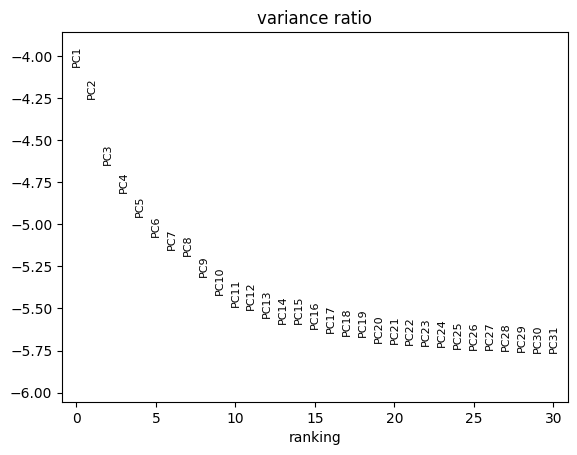

In [ ]:
## Make a scree plot to determine number of PCs to use for UMAP

sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
## Construct the nearest neighbor graph for UMAP

sc.pp.neighbors(adata, n_neighbors=50, n_pcs=20)

/home/maria_e/anaconda3/envs/myenv/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/maria_e/anaconda3/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
## Run UMAP

sc.tl.umap(adata)

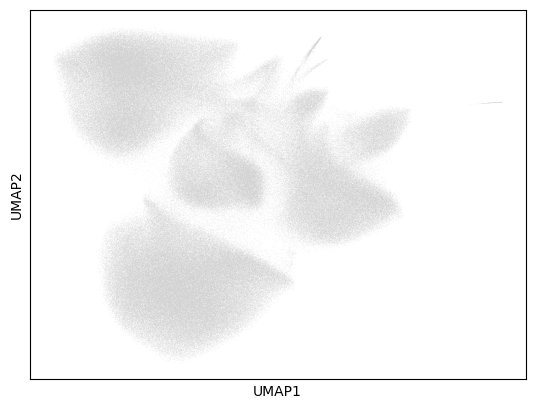

In [ ]:
sc.pl.umap(adata,use_raw=True)

In [ ]:
# Save the AnnData object with UMAP coordinates
# Define the full path where you want to save the file
output_path = '/media/external/testserver/maria_e/CRC/cNMF_data/adata_with_umap.h5ad'

# Save the AnnData object with UMAP coordinates to the specified path
adata.write(output_path)


In [ ]:
adata=sc.read('/media/external/testserver/maria_e/CRC/cNMF_data/adata_with_umap.h5ad')

/home/maria_e/anaconda3/envs/NMF/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata

AnnData object with n_obs × n_vars = 616622 × 342
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample', 'n_genes', 'n_counts', 'leiden_3_0', 'leiden_1_0', 'unique_id', 'combined_clusters'
    var: 'n_cells', 'mean', 'std'
    uns: 'combined_clusters_colors', 'leiden_1_0', 'leiden_3_0', 'leiden_3_0_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [ ]:
usage_norm, gep_scores, gep_tpm, topgenes =(K=11, density_threshold=0.10)
usage_norm.columns = ['Usage_%d' % i for i in usage_norm.columns]

SyntaxError: invalid syntax (3971174856.py, line 1)

For some reason it seems that the cells in usage_norm do not correspond exactly to your UMAP ones. We filter both so that we only keep the common ones'

In [ ]:
usage_norm_filt=usage_norm.loc[usage_norm.index.isin(adata.obs.index)]
adatasub=adata[adata.obs['cell_id'].isin(usage_norm_filt.index)]

I noticed some cell ids are duplicated in adata and in usage_norm. This is because, in different samples, ids can be repeated. Since we don't have unique ids, we can't really link the scores from usage_norm to individual cells. Therefore, we filter out them

In [ ]:
counted_ids=adatasub.obs.groupby('cell_id').count()
adatasub=adatasub[~adatasub.obs['cell_id'].isin(counted_ids[counted_ids.iloc[:,0]>1].index)]
usage_norm_filt=usage_norm_filt[~usage_norm_filt.index.isin(counted_ids[counted_ids.iloc[:,0]>1].index)]

In [ ]:
usage_norm_filt.shape

(616496, 11)

Now we combine the scores from usage_norm with the obs and we map them. Note that we use the filtered objects for both (adatasub and usage_norm_filt)

In [ ]:
adatasub.obs = pd.merge(left=adatasub.obs, right=usage_norm_filt, how='left', left_index=True, right_index=True)

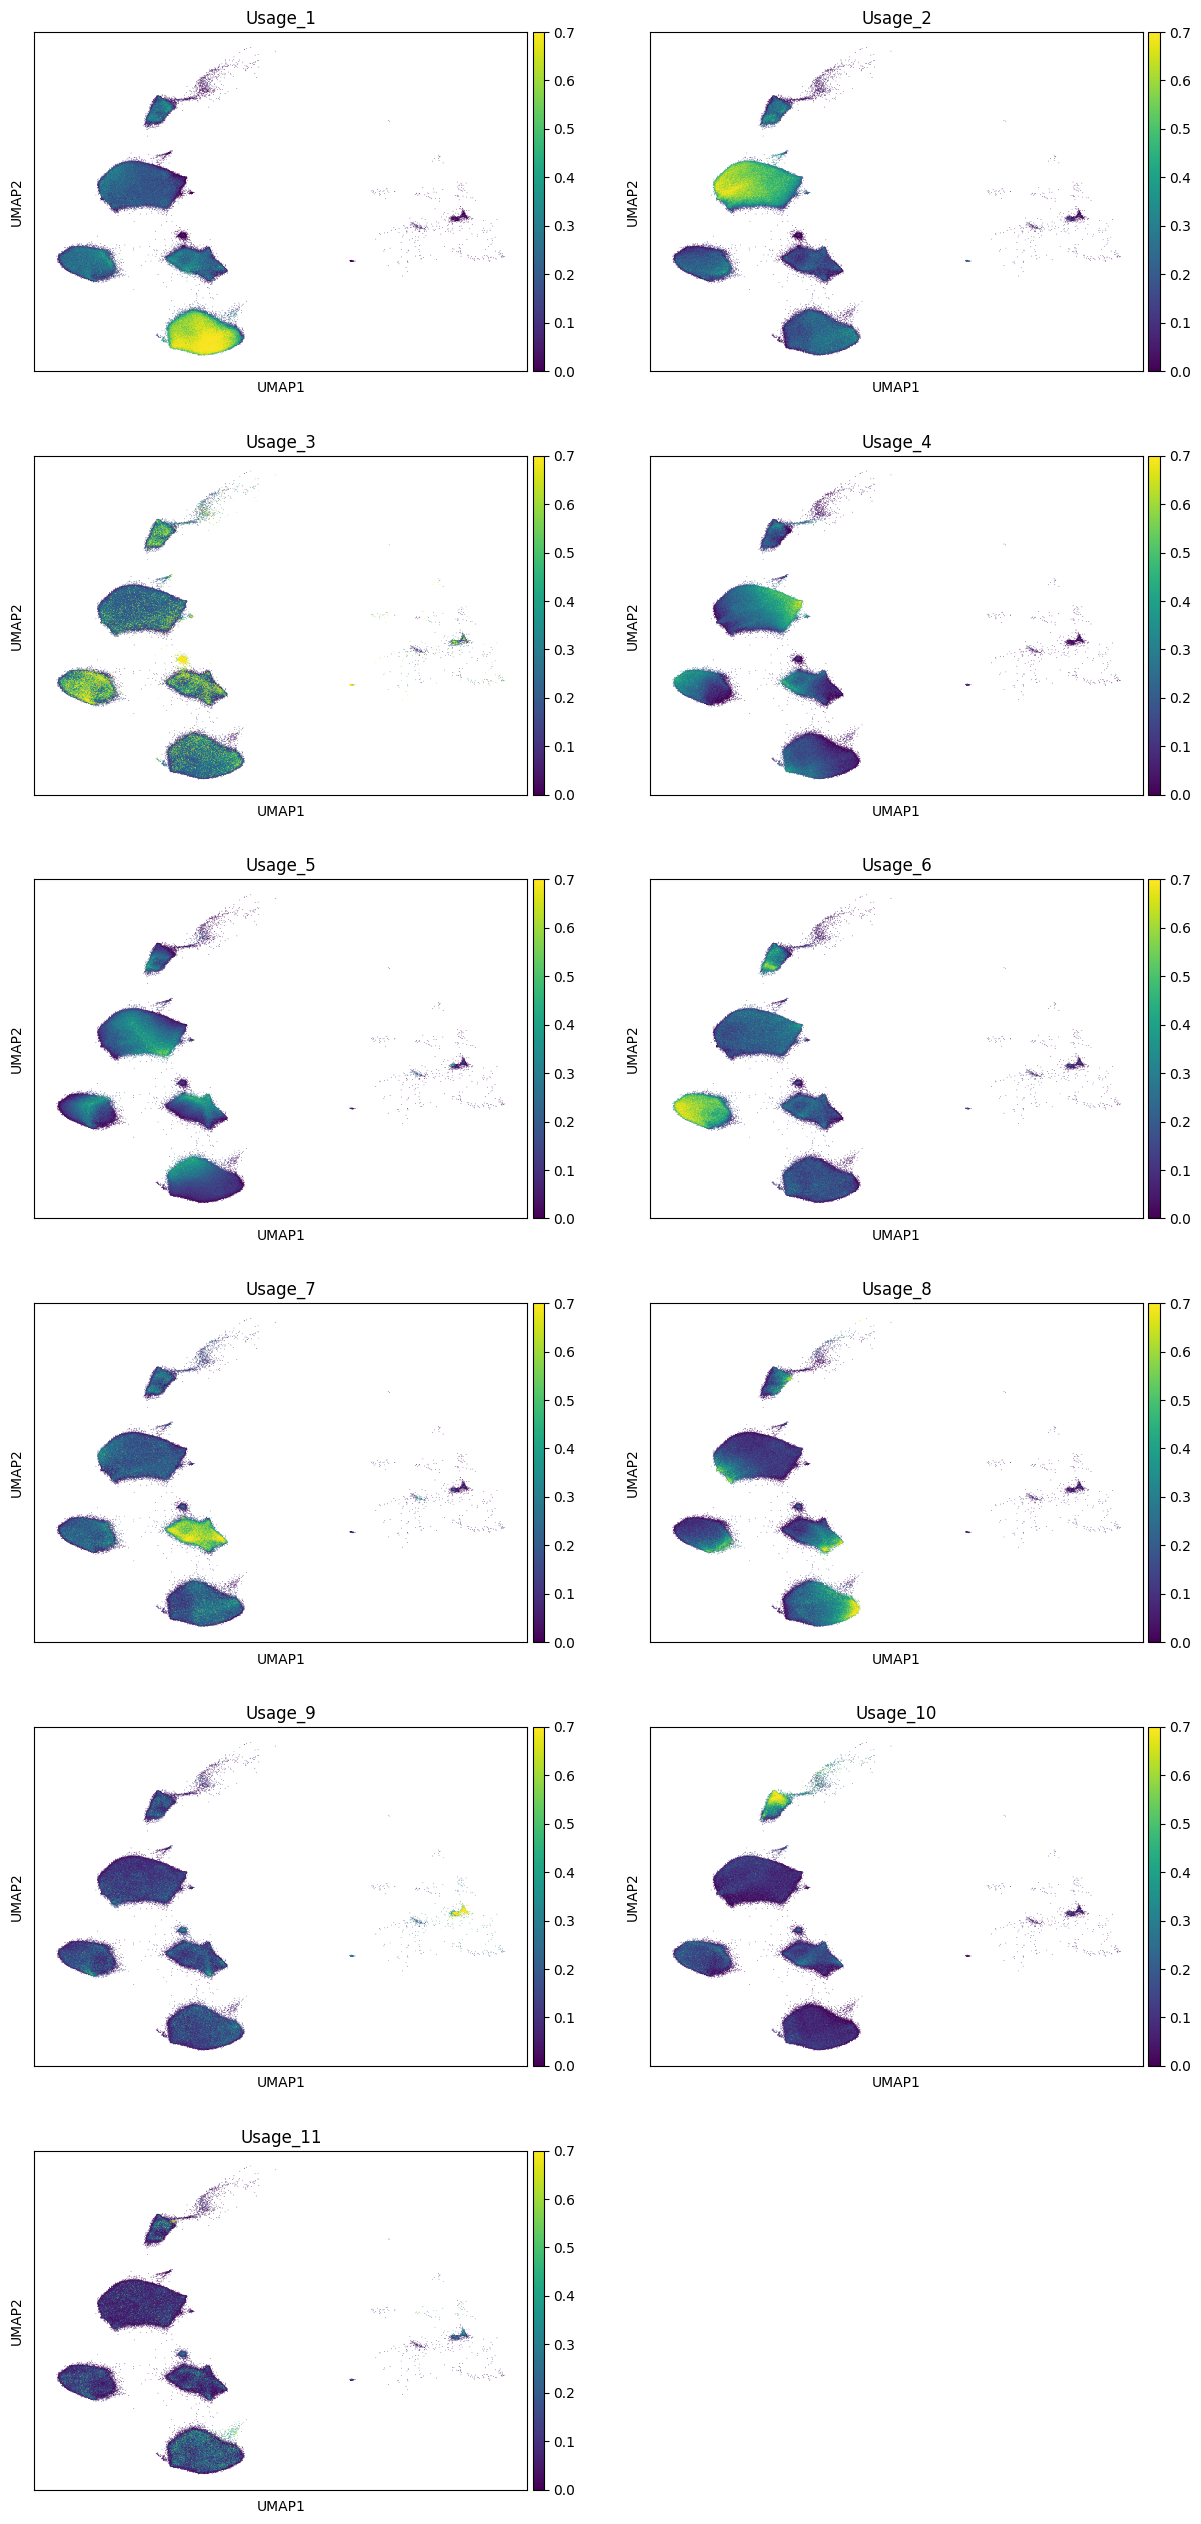

In [ ]:
sc.pl.umap(adatasub, color=usage_norm_filt.columns, s=1,
           use_raw=True, ncols=2, vmin=0, vmax=0.7,cmap='viridis')